In [94]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the dataset

data = pd.read_csv("3c3969d1-79b1-4bd9-a2e6-74e4200447ba_Data.csv")

In [3]:
data.head(2)

,Country Name,Series Name,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,Gini index (World Bank estimate),40.6,40.4,40.8,40.3,41,41.4,40.8,40.8,...,40.9,40.9,40.7,41.5,41.2,41.1,41.2,41.4,..,..
1,United States,Poverty headcount ratio at $1.90 a day (2011 P...,0.7,0.7,1,1,1,1,1,1,...,1,1,1,1.2,1.2,1,1.2,1,..,..


In [4]:
# replacing missing values with NAN

data.replace('..', np.nan, inplace = True)

In [5]:
# converting string numeric values to float

for column in data.columns[2:]:
    data[column] = data[column].astype('float32')

In [6]:
data.head(2)

,Country Name,Series Name,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,Gini index (World Bank estimate),40.599998,40.400002,40.799999,40.299999,41.0,41.400002,40.799999,40.799999,...,40.900002,40.900002,40.700001,41.5,41.200001,41.099998,41.200001,41.400002,NaN,NaN
1,United States,Poverty headcount ratio at $1.90 a day (2011 P...,0.700000,0.700000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.2,1.200000,1.000000,1.200000,1.000000,NaN,NaN


In [15]:
# getting the country names and the series names

country_names = data['Country Name'].unique()[:-3]
series_names = data['Series Name'].unique()[:-1]

In [130]:
series_dict = {}

for series in series_names:
    series_list = []
    for country in  country_names:
        value = (data[data['Country Name'] == country]
                         [data[data['Country Name'] == country]
                         ['Series Name'] == series]
                         [data[data['Country Name'] == country]
                         [data[data['Country Name'] == country]
                         ['Series Name'] == series]
                         .transpose().last_valid_index()].values[0])
        
        if isinstance(value, str):
            series_list.append(np.nan)
        else:
            series_list.append(value)
        series_dict[series] = series_list

In [131]:
country = 'Brazil'
series = 'Gini index (World Bank estimate)'
isinstance(data[data['Country Name'] == country]
                         [data[data['Country Name'] == country]
                         ['Series Name'] == series]
                         [data[data['Country Name'] == country]
                         [data[data['Country Name'] == country]
                         ['Series Name'] == series]
                         .transpose().last_valid_index()].values[0], str)

False

In [134]:
one_tri_club = pd.DataFrame(series_dict)
one_tri_club.index = country_names
one_tri_club.index.name = 'Countries'
# one_tri_club['Countries'] = country_names

In [135]:
one_tri_club

,Gini index (World Bank estimate),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"GDP, PPP (current international $)",GDP (current US$),GDP per capita (current US$),"GDP per capita, PPP (current international $)","Life expectancy at birth, total (years)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",...,Surface area (sq. km),"Population, total",Gross fixed capital formation (current US$),"Government expenditure on education, total (% of GDP)",Expenditure on tertiary education (% of government expenditure on education),Expenditure on secondary education (% of government expenditure on education),Expenditure on primary education (% of government expenditure on education),Research and development expenditure (% of GDP),Scientific and technical journal articles,"Patent applications, residents"
Countries,,,,,,,,,,,,,,,,,,,,,
United States,41.400002,1.0,2.095303e+13,2.095303e+13,63593.445312,63593.445312,78.787804,2.08855,14.13860,90.940521,...,9.831510e+06,3.294841e+08,4.478942e+12,NaN,27.502279,34.554859,30.964550,2.83283,422807.718750,285113.0
China,38.500000,0.5,2.428317e+13,1.472273e+13,10434.775391,17210.765625,76.912003,NaN,0.37868,22.316000,...,9.600013e+06,1.410929e+09,6.313509e+12,3.54249,NaN,NaN,NaN,2.14058,528263.250000,1243568.0
Japan,32.900002,0.7,5.334237e+12,5.057759e+12,40193.253906,42390.378906,84.356339,NaN,NaN,80.339363,...,3.779740e+05,1.258360e+08,1.279476e+12,NaN,19.797649,41.980221,35.119720,3.27512,98792.500000,245372.0
Germany,31.900000,0.0,4.560920e+12,3.846414e+12,46208.429688,54792.066406,80.941460,1.25296,11.19859,83.461304,...,3.575800e+05,8.324053e+07,8.405067e+11,4.99274,25.985790,41.256550,12.920940,3.13267,104396.117188,46632.0
United Kingdom,35.099998,0.3,3.124359e+12,2.759804e+12,41059.167969,46482.863281,81.204880,1.07943,13.57566,79.911133,...,2.436100e+05,6.721530e+07,4.720977e+11,5.23890,25.615891,37.837379,32.326740,1.70274,97680.898438,12061.0
India,35.700001,22.5,8.975477e+12,2.660245e+12,1927.707764,6503.948242,69.655998,NaN,NaN,26.888550,...,3.287259e+06,1.380004e+09,7.207646e+11,3.45098,28.526871,41.352940,28.401159,0.65282,135787.796875,19454.0
France,32.400002,0.0,3.166261e+12,2.630318e+12,39030.359375,46983.042969,82.578049,0.84628,10.51393,72.187347,...,5.490870e+05,6.739158e+07,6.040458e+11,5.41317,NaN,NaN,NaN,2.19294,66352.179688,14103.0
Italy,35.900002,1.4,2.491059e+12,1.888710e+12,31714.220703,41828.554688,83.197563,0.40126,12.96475,52.456032,...,3.020700e+05,5.955402e+07,3.355369e+11,4.25572,19.116730,42.743038,23.945551,1.39181,71240.281250,9229.0
Canada,33.299999,0.2,1.771474e+12,1.645423e+12,43294.648438,46611.308594,82.048782,0.94620,7.09874,84.469193,...,9.879750e+06,3.800524e+07,3.827663e+11,5.26205,35.599400,26.404249,NaN,1.54266,59967.789062,4238.0


In [136]:
# normalized_one_tri_club = (one_tri_club - one_tri_club.mean()) / one_tri_club.std()

normalized_one_tri_club = (one_tri_club - one_tri_club.min()) / (one_tri_club.max() - one_tri_club.min())

In [138]:
normalized_one_tri_club['Countries'] = country_names
normalized_one_tri_club

,Gini index (World Bank estimate),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"GDP, PPP (current international $)",GDP (current US$),GDP per capita (current US$),"GDP per capita, PPP (current international $)","Life expectancy at birth, total (years)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",...,"Population, total",Gross fixed capital formation (current US$),"Government expenditure on education, total (% of GDP)",Expenditure on tertiary education (% of government expenditure on education),Expenditure on secondary education (% of government expenditure on education),Expenditure on primary education (% of government expenditure on education),Research and development expenditure (% of GDP),Scientific and technical journal articles,"Patent applications, residents",Countries
Countries,,,,,,,,,,,,,,,,,,,,,
United States,0.454546,0.044444,0.854663,1.000000,1.000000,1.000000,0.621197,1.000000,0.996080,1.000000,...,0.219310,0.699835,NaN,0.591037,0.498850,0.607959,0.605994,0.793999,0.228471,United States
China,0.322727,0.022222,1.000000,0.686835,0.137955,0.187544,0.493594,NaN,0.000000,0.000000,...,1.000000,1.000000,0.215803,NaN,NaN,NaN,0.445050,1.000000,1.000000,China
Japan,0.068182,0.031111,0.173015,0.201026,0.620532,0.628600,1.000000,NaN,NaN,0.845519,...,0.072297,0.176350,NaN,0.201898,0.953312,0.747963,0.708823,0.161055,0.196481,Japan
Germany,0.022727,0.000000,0.139266,0.140138,0.718077,0.845832,0.767701,0.591235,0.783253,0.891012,...,0.041548,0.104528,0.662493,0.514444,0.909021,0.000000,0.675704,0.172001,0.036501,Germany
United Kingdom,0.168182,0.013333,0.076570,0.085520,0.634574,0.700285,0.785620,0.506345,0.955329,0.839279,...,0.029979,0.044250,0.738313,0.495761,0.699754,0.653856,0.343255,0.158883,0.008672,United Kingdom
India,0.195455,1.000000,0.331929,0.080515,0.000000,0.000000,0.000000,NaN,NaN,0.066631,...,0.977675,0.084936,0.187617,0.642787,0.914920,0.521588,0.099156,0.233323,0.014623,India
France,0.045455,0.000000,0.078399,0.079011,0.601674,0.709046,0.879031,0.392289,0.733690,0.726728,...,0.030106,0.065839,0.791989,NaN,NaN,NaN,0.457224,0.097685,0.010316,France
Italy,0.204546,0.062222,0.048931,0.041734,0.483032,0.618758,0.921174,0.174588,0.911105,0.439202,...,0.024448,0.021907,0.435484,0.167507,1.000000,0.371462,0.270966,0.107233,0.006392,Italy
Canada,0.086364,0.008889,0.017526,0.029505,0.670825,0.702535,0.843027,0.441170,0.486465,0.905699,...,0.008892,0.029634,0.745443,1.000000,0.000000,NaN,0.306038,0.085213,0.002375,Canada


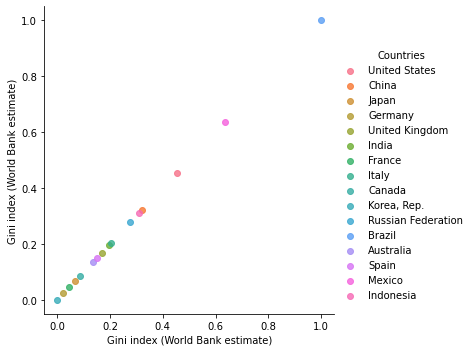

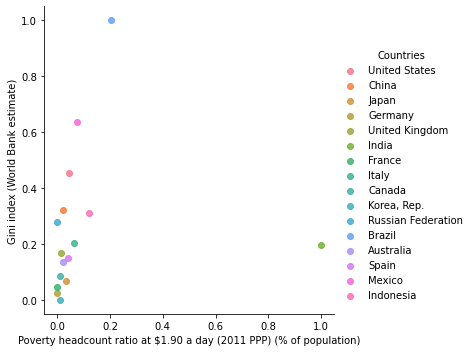

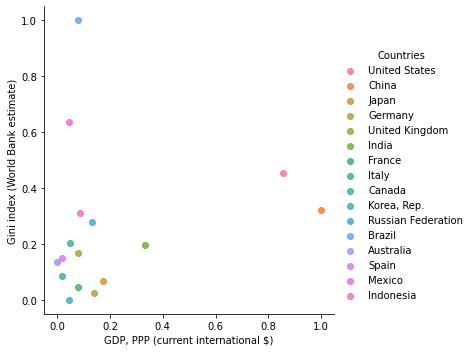

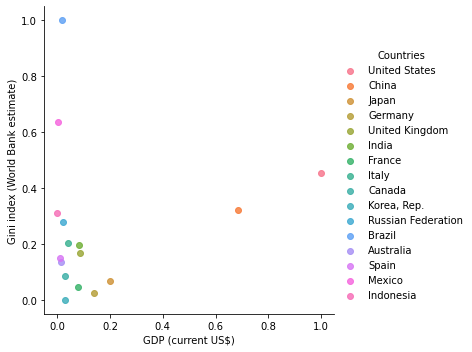

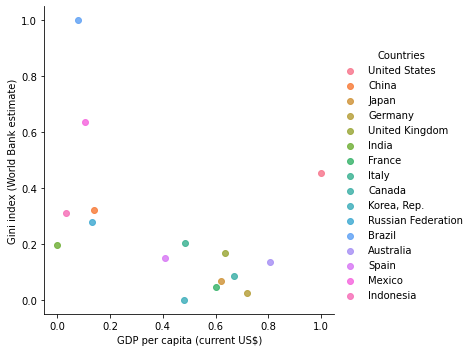

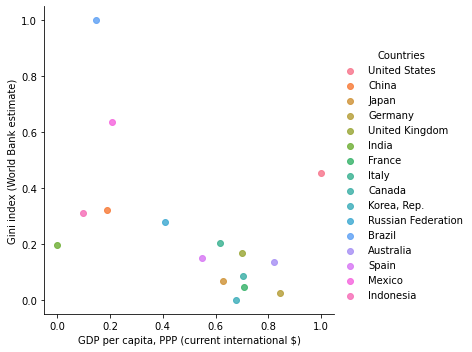

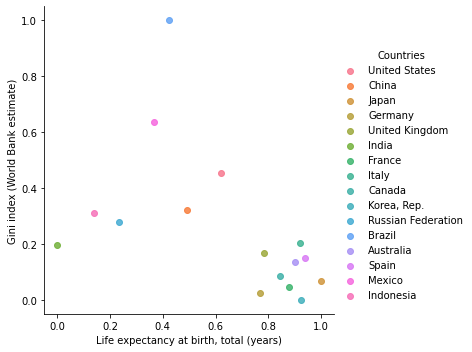

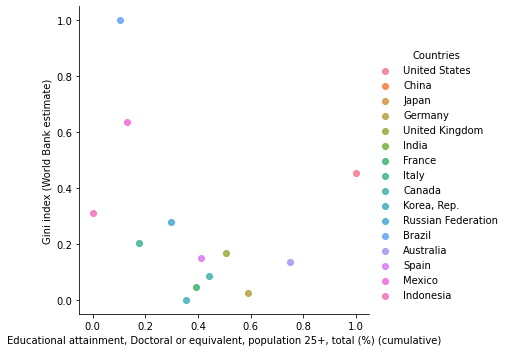

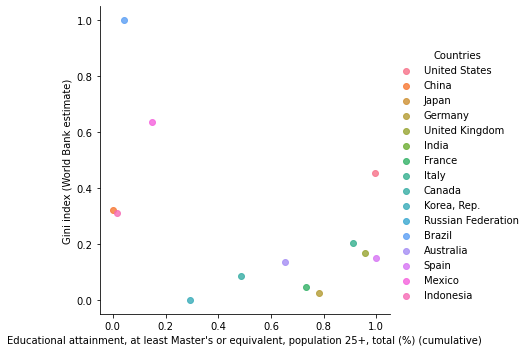

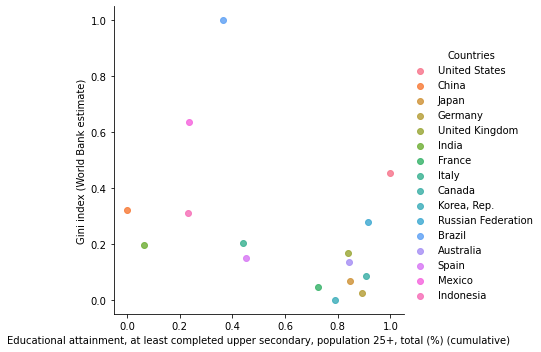

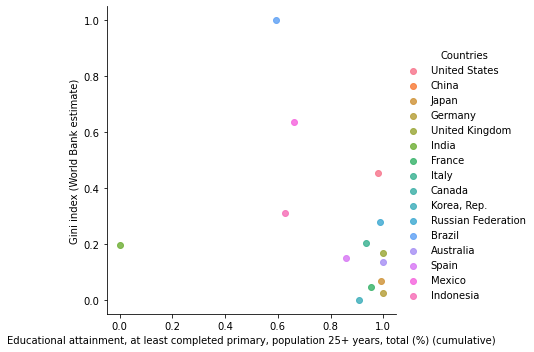

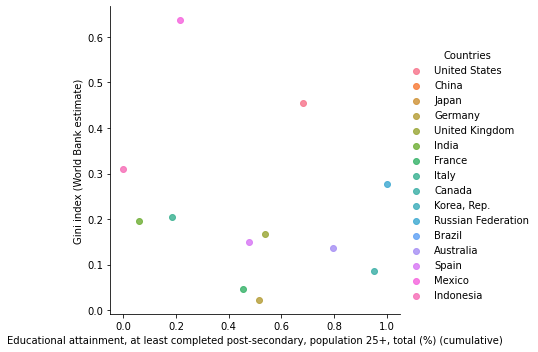

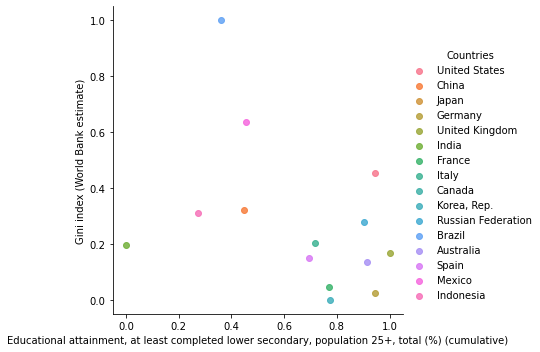

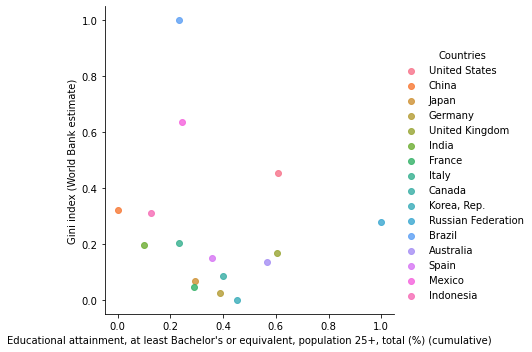

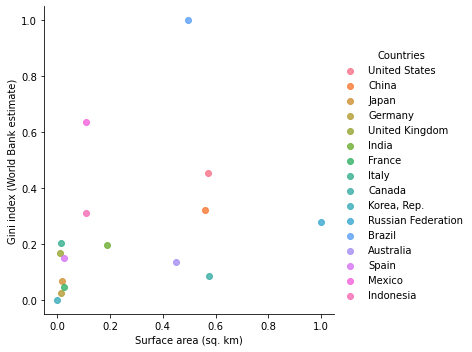

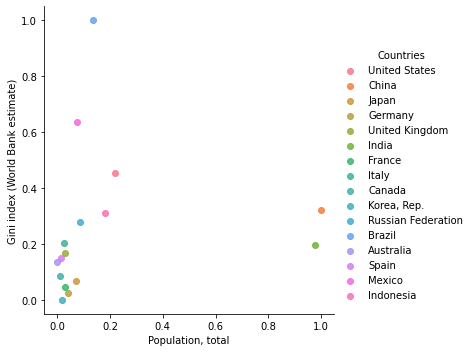

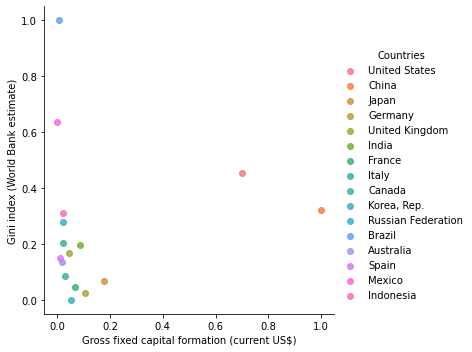

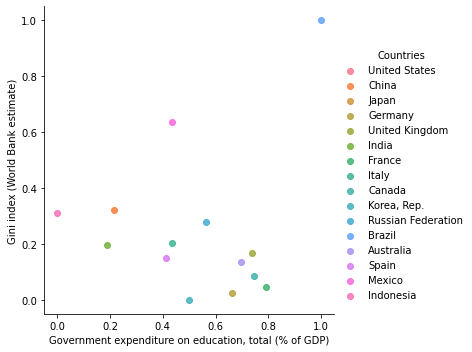

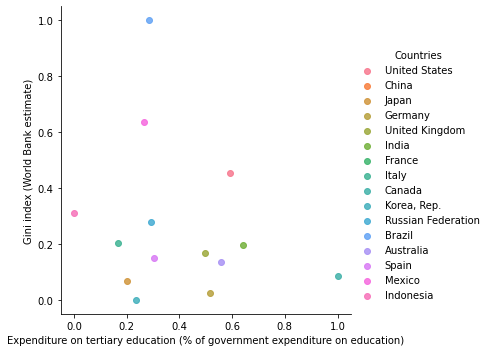

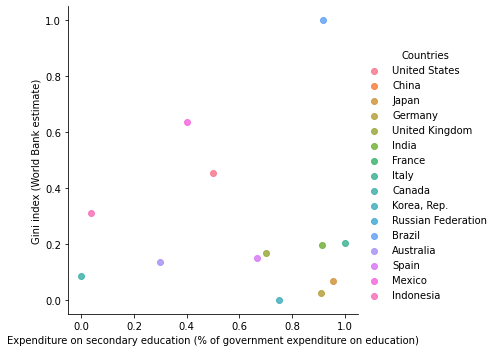

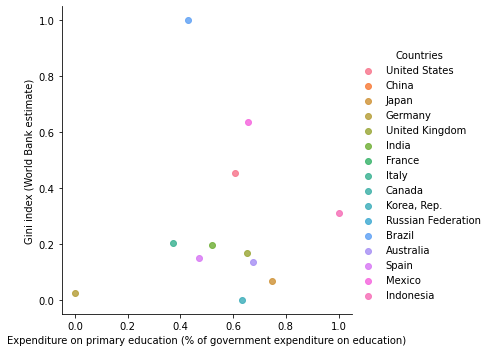

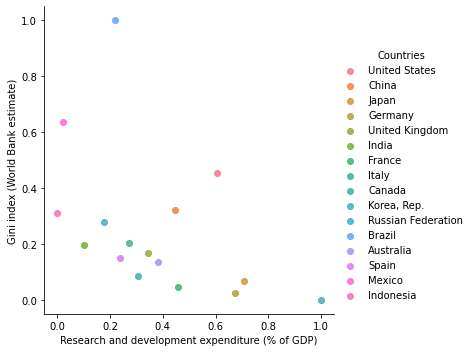

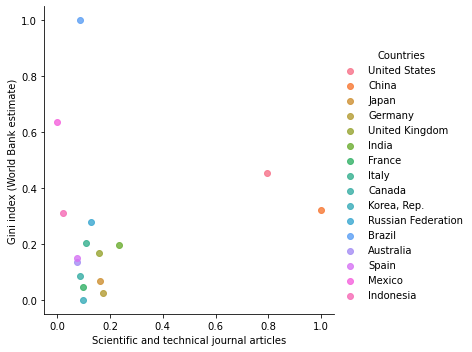

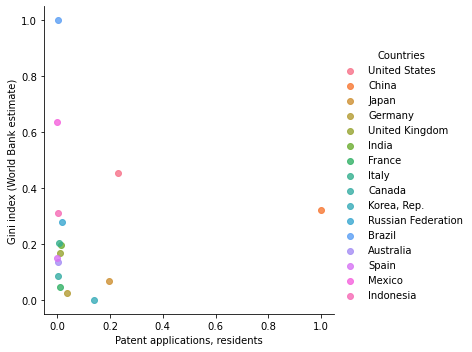

In [139]:
for series in series_names:
    
    sns.lmplot(x = series, y = 'Gini index (World Bank estimate)',
               data = normalized_one_tri_club,
               hue = 'Countries')#, fit_reg=False)

    plt.show()